useful resource: https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a

In [9]:
#code needed to use colab notebook
#if you're using juptyer notebook then skip this line
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


## these modules need to be installed before starting

In [2]:
%pip install chart_studio 

     |████████████████████████████████| 71kB 2.1MB/s 


In [3]:
%pip install scattertext

     |████████████████████████████████| 7.2MB 2.6MB/s 


In [4]:
!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [5]:
import pandas as pd
import numpy as np
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings 
warnings.filterwarnings('ignore')
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
import plotly.graph_objs as go
import chart_studio.plotly as py
import cufflinks
pd.options.display.max_columns = 30
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()
from collections import Counter
import scattertext as st
import spacy
from pprint import pprint
import en_core_web_sm
#nlp = spacy.load('en_core_web_md')
nlp = en_core_web_sm.load()

In [10]:
%cd "gdrive/My Drive/Colab Notebooks"
#%cd ..
!ls

/content/gdrive/My Drive/Colab Notebooks
 20200504-193926_joe_biden_nlp_subs_clean.csv
 20200504-193926_joe_biden_nlp_subs_clean_expanded.csv
 20200504-193926_joe_biden_nlp_subs.csv
'20200625-155513_gun_control (1).csv'
 20200625-155513_gun_control_nlp.csv
 20200625-155513_gun_control_nlp_subs_clean.csv
 20200625-155513_gun_control_nlp_subs_clean_expanded.csv
 20200625-155513_gun_control_nlp_subs.csv
 black_lives_nlp_subs_clean_expanded.csv
'Copy of nlp_model_training_v2.ipynb'
 Extract_subtitles.ipynb
 models
 nlp_EDA_v3.ipynb
 nlp_EDA_v4.ipynb
 nlp_model_training_v2.ipynb
 pandemic_nlp_subs_clean_expanded.csv


In [11]:
# load train_cleaned.csv
filename = "20200625-155513_gun_control_nlp_subs.csv"
df = pd.read_csv(filename, index_col=0)

df['text'] = df['subtitles']
df.dropna(inplace=True)

df.head(2)

,Bias_num,title,description,channel,id,subtitles,text
0,0,"Richard Dawkins on Islam, Jews, science and th...",Evan Davis speaks to Richard Dawkins. ** Subsc...,BBC Newsnight,YAV_0s1c2V4,"[""Dawkins is famous as the author of The Selfi...","[""Dawkins is famous as the author of The Selfi..."
1,0,What would a second wave look like? | CNBC Exp...,Past pandemics have shown that multiple waves ...,CNBC International,Hc2kSVBuDns,"[""Of the last five pandemics the world has fac...","[""Of the last five pandemics the world has fac..."


In [12]:
#length of dataset
print(f'Length of dataset is: {len(df)}')

#percentage of videos that are right
pr_right = round(df['Bias_num'].mean()*100,2)
print(f'Percentage of videos that are right: {pr_right} %')

Length of dataset is: 50
Percentage of videos that are right: 8.0 %


## Analysis

In [13]:
#calculate number of characters
df['review_len'] = df['text'].astype(str).apply(len)

#calculate number of words
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
df.head()

,Bias_num,title,description,channel,id,subtitles,text,review_len,word_count
0,0,"Richard Dawkins on Islam, Jews, science and th...",Evan Davis speaks to Richard Dawkins. ** Subsc...,BBC Newsnight,YAV_0s1c2V4,"[""Dawkins is famous as the author of The Selfi...","[""Dawkins is famous as the author of The Selfi...",8024,1500
1,0,What would a second wave look like? | CNBC Exp...,Past pandemics have shown that multiple waves ...,CNBC International,Hc2kSVBuDns,"[""Of the last five pandemics the world has fac...","[""Of the last five pandemics the world has fac...",5134,765
2,0,Ricky Gervais and Richard Dawkins in Conversation,"Multi-award-winning stand-up comedian, screenw...",Center for Inquiry,b0BC3F0kqtw,"[""Oh, thank you Fairey Thank you Thank you. Ve...","[""Oh, thank you Fairey Thank you Thank you. Ve...",62873,11964
3,0,Stephen Fry and Richard Dawkins in Conversation,"Stephen Fry and Richard Dawkins, two of the mo...",Center for Inquiry,SYPZwZud_PA,"[""I'm the attorney first CFI and I'm the perso...","[""I'm the attorney first CFI and I'm the perso...",49016,9387
4,0,GREG DAVIES FREAKS OUT WHEN CHRIS EUBANK TURNS...,Watch the new series of 8 Out of 10 Cats Does ...,Channel 4,xU-3Zdei1N0,"[""Susi's had a complex and thing because I hea...","[""Susi's had a complex and thing because I hea...",6752,1342


(array([23.,  7.,  9.,  4.,  1.,  1.,  2.,  0.,  2.,  1.]),
 array([ 1953. ,  8769.1, 15585.2, 22401.3, 29217.4, 36033.5, 42849.6,
        49665.7, 56481.8, 63297.9, 70114. ]),
 <a list of 10 Patch objects>)

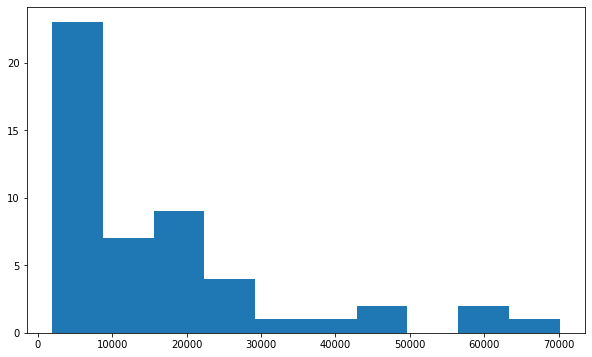

In [14]:
plt.hist(df['review_len'])

(array([24.,  9.,  8.,  2.,  1.,  0.,  2.,  1.,  0.,  3.]),
 array([  367. ,  1583.9,  2800.8,  4017.7,  5234.6,  6451.5,  7668.4,
         8885.3, 10102.2, 11319.1, 12536. ]),
 <a list of 10 Patch objects>)

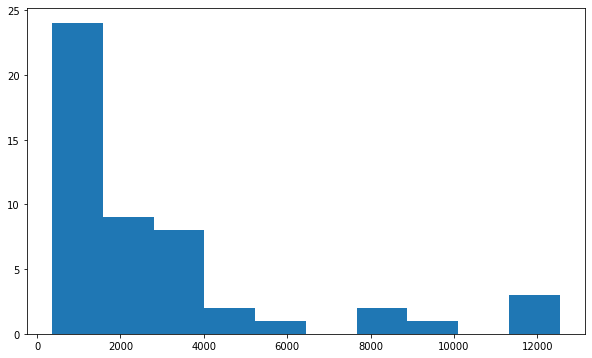

In [15]:
plt.hist(df['word_count'])

In [16]:
x1 = df.loc[df['Bias_num'] == 1, 'word_count']
x0 = df.loc[df['Bias_num'] == 0, 'word_count']

trace1 = go.Histogram(
    x=x0, name='Left',
    opacity=0.75
)
trace2 = go.Histogram(
    x=x1, name = 'Right',
    opacity=0.75
)

data = [trace1, trace2]
layout = go.Layout(barmode='overlay', title='Distribution of word count based on bias')
fig = go.Figure(data=data, layout=layout)
fig.show()

In [17]:
x1 = df.loc[df['Bias_num'] == 1, 'review_len']
x0 = df.loc[df['Bias_num'] == 0, 'review_len']

trace1 = go.Histogram(
    x=x0, name='Left',
    opacity=0.75
)
trace2 = go.Histogram(
    x=x1, name = 'Right',
    opacity=0.75
)

data = [trace1, trace2]
layout = go.Layout(barmode='overlay', title='Distribution of review_len based on bias')
fig = go.Figure(data=data, layout=layout)
fig.show()

## The distribution of top unigrams before removing stop words

In [18]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['text'], 20)
df1 = pd.DataFrame(common_words, columns = ['text' , 'count'])
df1
df1.groupby('text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in review before removing stop words')

,text,count
0,the,6556
1,and,4712
2,to,3769
3,you,3635
4,that,3515
5,of,3461
6,it,3076
7,in,2308
8,is,2009
9,we,1496


## The distribution of top unigrams after removing stop words

In [19]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['text'], 20)
df2 = pd.DataFrame(common_words, columns = ['text' , 'count'])
df2
df2.groupby('text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in review after removing stop words')

,text,count
0,know,1037
1,just,809
2,like,808
3,people,704
4,think,660
5,don,494
6,ve,475
7,xa0,428
8,got,351
9,said,329


## The distribution of top bigrams before removing stop words

In [20]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['text'], 20)
df3 = pd.DataFrame(common_words, columns = ['text' , 'count'])
df3
df3.groupby('text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in review before removing stop words')


,text,count
0,you know,644
1,of the,592
2,in the,555
3,you re,353
4,if you,333
5,to be,283
6,it was,265
7,this is,259
8,and the,240
9,on the,221


## The distribution of top bigrams after removing stop words

In [21]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['text'], 20)
df4 = pd.DataFrame(common_words, columns = ['text' , 'count'])
df4
df4.groupby('text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in review after removing stop words')

,text,count
0,ve got,130
1,don know,128
2,united states,58
3,little bit,40
4,don want,39
5,carbon dioxide,37
6,new york,36
7,white house,36
8,think think,35
9,don think,34


## The distribution of Top trigrams before removing stop words

In [22]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df['text'], 20)
df5 = pd.DataFrame(common_words, columns = ['text' , 'count'])
df5
df5.groupby('text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 trigrams in review before removing stop words')

,text,count
0,one of the,75
1,if you re,61
2,in the world,56
3,you know and,53
4,the united states,52
5,re going to,51
6,you ve got,45
7,you have to,44
8,going to be,43
9,you know it,37


## The distribution of Top trigrams after removing stop words

In [23]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df['text'], 20)
df6 = pd.DataFrame(common_words, columns = ['text' , 'count'])
#df6
df6.groupby('text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 trigrams in review after removing stop words')

## Finding characteristic terms and their associations

In [24]:
#convert Bias_num to string
df_corpus = df.copy()
df_corpus['Bias_num'] = df_corpus['Bias_num'].apply(str)
df_corpus.dtypes

Bias_num       object
title          object
description    object
channel        object
id             object
subtitles      object
text           object
review_len      int64
word_count      int64
dtype: object

In [ ]:
#Following are the terms that differentiate the review text from a general English corpus.
corpus = st.CorpusFromPandas(df_corpus, category_col='Bias_num', text_col='text', nlp=nlp).build()
print(list(corpus.get_scaled_f_scores_vs_background().index[:10]))

['twitter', 'gon', 'modi', 'falsetto', 'letterers', 'metoo', 'covid', 'technicolor', 'psychopath', 'lalit']


In [ ]:
#Following are the terms in review text that are most associated with right wing channels:
term_freq_df = corpus.get_term_freq_df()
term_freq_df['Right score'] = corpus.get_scaled_f_scores("1")
pprint(list(term_freq_df.sort_values(by='Right score', ascending=False).index[:20]))

['yields',
 'stimulus',
 'higher education',
 'alexander',
 'yield',
 'spending',
 'bonds',
 'narrator',
 'negative',
 'bond',
 'lockdown',
 'investors',
 'commercial',
 'pleasant',
 'a bond',
 '90',
 'banks',
 'treasury',
 'higher',
 'the economy']


In [ ]:
#Following are the terms in review text that are most associated with left wing channels:
term_freq_df = corpus.get_term_freq_df()
term_freq_df['Left score'] = corpus.get_scaled_f_scores("0")
pprint(list(term_freq_df.sort_values(by='Left score', ascending=False).index[:20]))

['got',
 'said',
 '’s',
 'us',
 'i do',
 'him',
 "i 've",
 'it\\',
 "it\\ 's",
 'i was',
 'she',
 'oh',
 'do you',
 'okay',
 'and you',
 "'s the",
 'just',
 'two',
 'president',
 'gon']
